# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the most effective drug regimens for treating tumors in mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = merged_df['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])==True]
dup['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merged_df.loc[merged_df['Mouse ID'] == dup['Mouse ID'].values[0]]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.set_index('Mouse ID', inplace=True)
clean_df = merged_df.drop(index=dup['Mouse ID'].values[0])
clean_df.reset_index(inplace=True)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_group = clean_df.groupby('Drug Regimen')
tumor_mean = tumor_group['Tumor Volume (mm3)'].mean()
tumor_median = tumor_group['Tumor Volume (mm3)'].median()
tumor_variance = tumor_group['Tumor Volume (mm3)'].var()
tumor_std = tumor_group['Tumor Volume (mm3)'].std()
tumor_sem = tumor_group['Tumor Volume (mm3)'].sem()

tumor_df = pd.merge(tumor_mean, tumor_median, on='Drug Regimen')
tumor_df = tumor_df.rename(columns={'Tumor Volume (mm3)_x':'Mean Tumor Volume', 'Tumor Volume (mm3)_y':'Median Tumor Value'})
tumor_df = pd.merge(tumor_df, tumor_variance, on='Drug Regimen')
tumor_df = tumor_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
tumor_df = pd.merge(tumor_df, tumor_std, on='Drug Regimen')
tumor_df = tumor_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
tumor_df = pd.merge(tumor_df, tumor_sem, on='Drug Regimen')
tumor_df = tumor_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})
tumor_df

,Mean Tumor Volume,Median Tumor Value,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

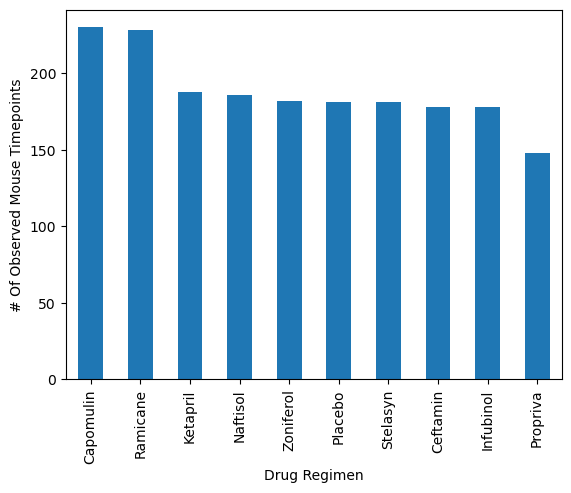

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
time_count = tumor_group['Timepoint'].count().sort_values(ascending=False)
time_df = time_count.reset_index()
plot = time_df.plot(kind='bar',x='Drug Regimen', y='Timepoint', ylabel='# Of Observed Mouse Timepoints', legend=False)


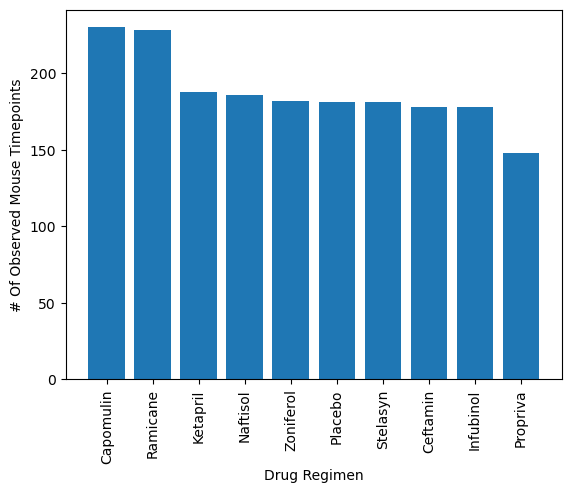

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(time_df['Drug Regimen'].nunique())
plt.bar(x_axis, time_df['Timepoint'], align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, time_df['Drug Regimen'], rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.show()

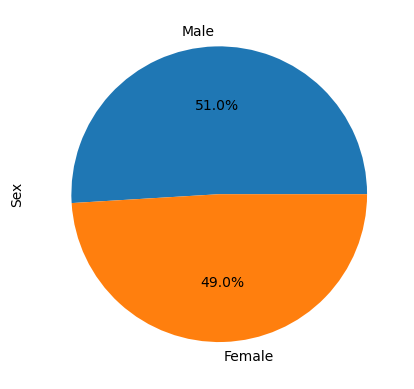

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = clean_df.groupby('Sex')
sex_count = sex_group['Timepoint'].count().sort_values(ascending=False)
sex_df = sex_count.reset_index()
sex_df2 = sex_df.rename(columns={'Timepoint':'Count'}).set_index('Sex')
plot = sex_df2.plot(kind='pie',y='Count', autopct='%1.1f%%', legend=False, ylabel='Sex')

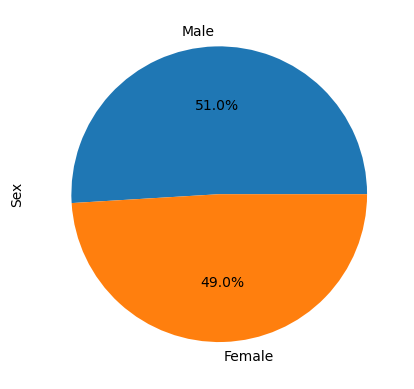

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_df['Sex']
colors = ['blue', 'orange']
plt.pie(sex_df['Timepoint'],labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_group = clean_df.groupby('Mouse ID')
max_df = max_group['Timepoint'].max()
max_df = max_df.reset_index()
max_df.rename(columns={'Timepoint':'Last Timepoint'},inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(clean_df, max_df, on='Mouse ID')
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
x = -1
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    x = x + 1
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treat_df = new_df.loc[(new_df["Timepoint"] == new_df['Last Timepoint']) &
                    (new_df["Drug Regimen"] == treatment),'Tumor Volume (mm3)']

    # add subset 
    tumor_vol.append(treat_df)
    # Determine outliers using upper and lower bounds
    lowerq = np.quantile(tumor_vol[x],0.25)
    upperq = np.quantile(tumor_vol[x],0.75)
    iqr = upperq-lowerq
    print(f"{treatment}'s IQR is {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = list(filter(lambda y: (y < lower_bound) | (y > upper_bound), tumor_vol[x]))
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's IQR is 7.781863460000004
Capomulin's potential outliers: []
Ramicane's IQR is 9.098536719999998
Ramicane's potential outliers: []
Infubinol's IQR is 11.477135160000003
Infubinol's potential outliers: [36.3213458]
Ceftamin's IQR is 15.577752179999997
Ceftamin's potential outliers: []


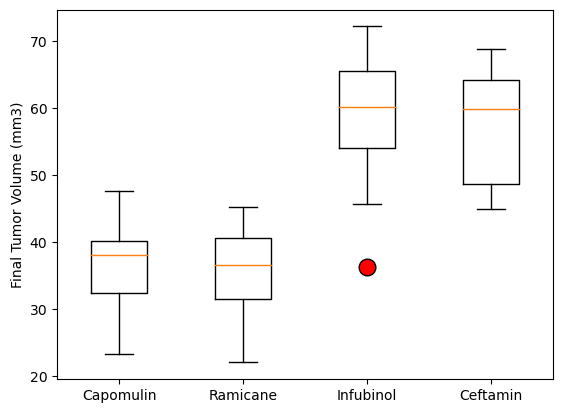

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, flierprops=dict(markerfacecolor='red', markersize=12))
x_axis = np.arange(len(tumor_vol))
tick_locations = [value + 1 for value in x_axis]
plt.xticks(tick_locations, treatments)
plt.show()

## Line and Scatter Plots

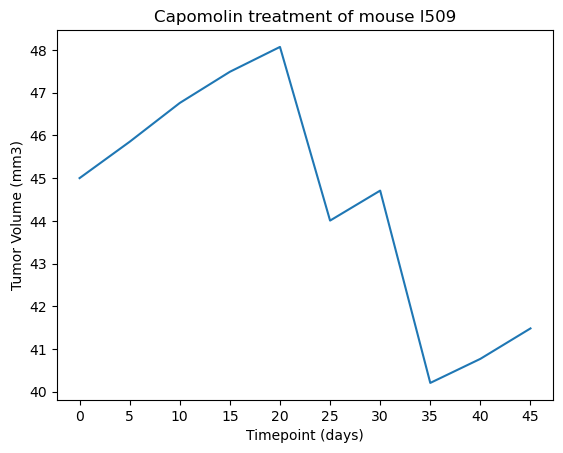

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_df = new_df.loc[new_df['Mouse ID'] == 'l509']
x_axis = np.arange(single_df['Timepoint'].nunique())
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, single_df['Timepoint'])
plt.plot(x_axis,single_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomolin treatment of mouse l509')
plt.show()

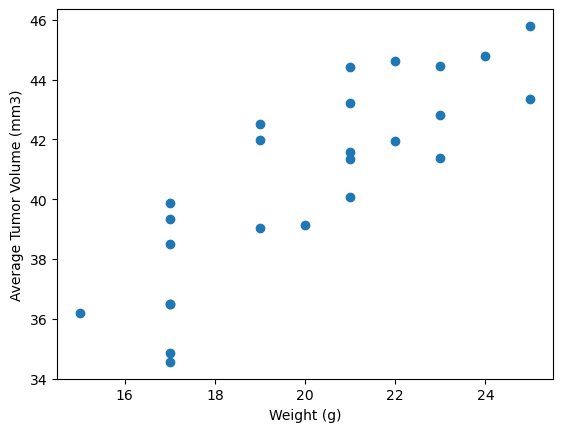

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df = new_df.loc[new_df['Drug Regimen'] == 'Capomulin']
capo_group = capo_df.groupby('Mouse ID')
capo_mean = capo_group[['Tumor Volume (mm3)','Weight (g)']].mean()
x_axis = np.array(capo_mean['Weight (g)'])
y_axis = np.array(capo_mean['Tumor Volume (mm3)'])
plt.scatter(x_axis, y_axis, marker="o")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


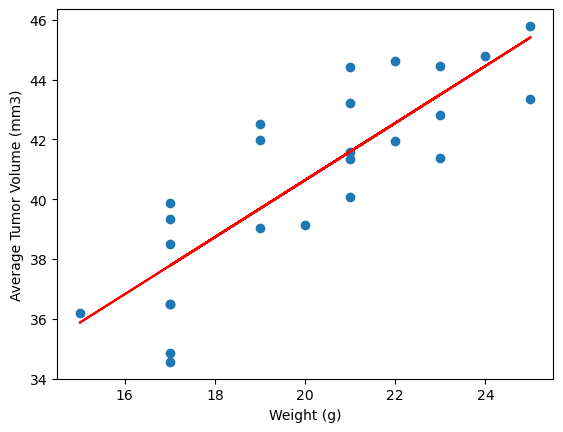

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()